### Проанализировать данные и поискать в них интересные инсайты, построить графики.
### Инструменты: jupyter notebook или excel + отчет в pdf

### Переменные, характеризующие кредитную историю клиента:
1. cred_sum_cc_all - сумма кредитов по кредитным картам
2. mfo_inqs_count_month - количество запросов на кредиты в другие в МФО
3. all_closed_creds_sum_all - сумма закрытых кредитов
4. bank_inqs_count_quarter - количество запросов на кредиты в банки
5. cred_max_overdue_max_ly - максимальная просрочка за год
6. all_active_creds_sum_all - денежная сумма всех активных кредитов
7. mfo_last_days_all - Количество дней с последнего займа в МФО
8. cred_sum_cc_ly - Сумма лимитов кредитных карт, оформленных за последний год
9. cred_sum_debt_all_all - Сумма задолженности по всем кредитам
10. all_closed_creds_sum_ly - Сумма закрытых кредитов за последний год
11. mfo_cred_mean_sum_3lm - Средняя сумма МФО кредитов, выданных за последние 3 месяца
12. delay_more_sum_all - Количество просрочек более чем на 90 дней по всем кредитам
13. all_creds_count_all - Общее количество кредитов
14. cred_day_overdue_all_sum_all - Суммарное количество дней просрочки текущих активных кредитов
15. cred_max_overdue_max_3lm - Максимальная сумма просроченной задолженности, по кредитам взятым за последние 3 месяца
16. mfo_closed_count_ly - Количество закрытых МФО кредитов, взятых за последний год
17. cred_sum_overdue_cc_all - Сумма просрочек по кредитным картам
18. count_overdue_all_3lm - Количество кредитов на просрочке, взятых за последние 3 месяца
19. all_creds_count_lm - Количество кредитов, взятых за последний месяц 
20. region - регион подачи заявки

### Переменные характеризующие клиента
21. work_code - Профессия. 
   - 5 - рабочие профессии (слесарь, токарь). 
   - 3 - офисный работник (бухгалтер, программист). 
   - 1 - госслужащий (полицейский, медсестра)
22. month_income - доход

### Целевые переменные:
23. bad 
    - 1 - кредит просрочен, 
    - 0 - кредит возвращен, 
    - nan - отказ.
24. approved 
    - 1 - одобрено, 
    - 0 - отказано.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('3_task_data.csv')

In [3]:
#Настройка вывода кол. колонок
pd.set_option("display.max_columns",30)

In [4]:
#Посмотрим как считались данные
df.head()

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,all_closed_creds_sum_ly,mfo_cred_mean_sum_3lm,delay_more_sum_all,all_creds_count_all,cred_day_overdue_all_sum_all,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
0,5498546,0.0,0,40364,0,0.0,3000,560,0.0,0.0,0,0.0,2,3,529,0.0,0,0.00,0,0,3,50000,46,NaN,0
1,5498604,1500.0,0,23456,0,0.0,0,9999,0.0,0.0,0,0.0,10,3,0,0.0,0,0.00,0,0,3,35000,17,NaN,0
2,5498609,0.1,0,17999,3,0.0,9999,9999,0.1,9999.0,0,0.0,18,4,0,0.0,0,0.00,0,2,3,35000,58,NaN,0
3,5498645,5000.0,0,313247,0,0.0,0,9999,0.0,0.0,0,0.0,8,5,0,0.0,0,4923.97,0,0,5,35000,4,NaN,0
4,5498647,0.0,0,0,1,0.0,0,9999,0.0,0.0,0,0.0,11,1,0,0.0,0,0.00,0,0,5,35000,34,NaN,0


In [5]:
# 23116 -клиентов и 23 признака + 2 целевых
df.shape

(23116, 25)

In [6]:
# кроме колонки bad пропусков в данных нет, типы данных - числовые(предобработка не требуется)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23116 entries, 0 to 23115
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   order_id                      23116 non-null  int64  
 1   cred_sum_cc_all               23116 non-null  float64
 2   mfo_inqs_count_month          23116 non-null  int64  
 3   all_closed_creds_sum_all      23116 non-null  int64  
 4   bank_inqs_count_quarter       23116 non-null  int64  
 5   cred_max_overdue_max_ly       23116 non-null  float64
 6   all_active_creds_sum_all      23116 non-null  int64  
 7   mfo_last_days_all             23116 non-null  int64  
 8   cred_sum_cc_ly                23116 non-null  float64
 9   cred_sum_debt_all_all         23116 non-null  float64
 10  all_closed_creds_sum_ly       23116 non-null  int64  
 11  mfo_cred_mean_sum_3lm         23116 non-null  float64
 12  delay_more_sum_all            23116 non-null  int64  
 13  a

In [7]:
df.describe()

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,all_closed_creds_sum_ly,mfo_cred_mean_sum_3lm,delay_more_sum_all,all_creds_count_all,cred_day_overdue_all_sum_all,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
count,2.311600e+04,2.311600e+04,23116.000000,2.311600e+04,23116.000000,2.311600e+04,2.311600e+04,23116.000000,23116.000000,2.311600e+04,2.311600e+04,23116.000000,23116.000000,23116.000000,23116.000000,23116.000000,23116.000000,2.311600e+04,23116.000000,23116.000000,23116.000000,23116.000000,23116.000000,7269.000000,23116.000000
mean,6.060602e+06,4.424794e+04,1.284262,1.653574e+05,3.760642,4.070925e+03,1.284212e+05,2615.988925,10672.104919,8.414683e+04,3.006949e+04,4228.567470,5.084487,11.403876,259.105944,1107.137568,3.474087,4.878172e+03,0.118576,1.080637,3.433250,39363.189998,47.632203,0.270051,0.314458
std,3.678480e+05,1.006016e+05,2.373415,4.788942e+05,5.057107,2.689042e+04,3.890718e+05,4228.621029,37246.943546,3.054724e+05,1.021166e+05,8216.632710,11.628365,18.543562,768.039823,7073.931364,9.202313,3.793714e+04,0.466854,2.137757,1.370812,13887.644526,27.615823,0.444016,0.464310
min,5.498546e+06,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.739749e+06,0.000000e+00,0.000000,3.000000e+03,0.000000,0.000000e+00,2.000000e+03,13.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2.000000,35000.000000,25.000000,0.000000,0.000000
50%,6.020794e+06,5.000000e+03,0.000000,3.083450e+04,2.000000,0.000000e+00,1.500000e+04,83.500000,0.000000,5.000000e+03,0.000000e+00,1000.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,3.000000,35000.000000,46.000000,0.000000,0.000000
75%,6.445488e+06,4.972685e+04,2.000000,1.357758e+05,5.000000,3.000000e+03,7.500000e+04,2070.500000,0.000000,3.496056e+04,2.000000e+04,6266.754762,5.000000,13.000000,70.000000,0.000000,3.000000,0.000000e+00,0.000000,1.000000,5.000000,50000.000000,70.000000,1.000000,1.000000
max,6.697265e+06,5.739786e+06,25.000000,3.030997e+07,67.000000,1.914581e+06,1.200000e+07,9999.000000,878000.000000,1.150825e+07,4.929320e+06,315200.000000,171.000000,546.000000,15327.000000,673495.420000,344.000000,2.878197e+06,10.000000,48.000000,5.000000,65000.000000,99.000000,1.000000,1.000000


### Конструирование и предобработка признаков

In [9]:
d = {0 : 'отказано', 1 : 'одобрено'}
df['approved'] = df['approved'].map(d)

In [10]:
# df где клиентом одобренно
df_approve = df[df['approved'] == 'одобрено']

In [11]:
# df где клиентом отказано
df_refuse = df[df['approved'] == 'отказано']

In [12]:
#для тех у кого прошло несколько лет с последнего займа
df['year_last'] = df['mfo_last_days_all'] // 365

In [13]:
# Сумма задолженности по всем кредитам поделим  на общее количество кредитов
df['Средняя задолженность'] = df['cred_sum_debt_all_all'] / df['all_creds_count_all']

In [14]:
bad_ = {0 : 'кредит возвращен', 1 : 'кредит просрочен'}
df['bad'] = df['bad'].map(bad_)

In [15]:
# кол. месяцев чтобы покрыть задолженность  по всем кредитам
# берем тех у кого есть зп ( чтобы не было деления на 0) и тех у кого есть задолженность
df_month = df[(df['month_income'] != 0) & (df['cred_sum_debt_all_all'] != 0)]
df['Месяцев на покрытие'] = df_month['cred_sum_debt_all_all'] / df_month['month_income']

In [16]:
# 1 если есть просрочка и 0 если без просроков
df['Есть просрочка активных кредитов'] = df['cred_day_overdue_all_sum_all'].apply(lambda x : 0 if x == 0 else 1)

In [17]:
df['Был взят кредит за последний месяц'] = df['all_creds_count_lm'].apply(lambda x : 0 if x == 0 else 1)

In [18]:
df['Делают запросы в банки или другие МФО'] = (df['mfo_inqs_count_month'] + df['bank_inqs_count_quarter']).apply(lambda x : 0 if x == 0 else 1)

### Анализ данных

In [19]:
#Распределение по целевой переменной одобренным кредитам 7269 из 23116
df['approved'].value_counts()

отказано    15847
одобрено     7269
Name: approved, dtype: int64

In [20]:
#68,5% отказов / 31,5% одобренно
df['approved'].value_counts(normalize=True)

отказано    0.685542
одобрено    0.314458
Name: approved, dtype: float64

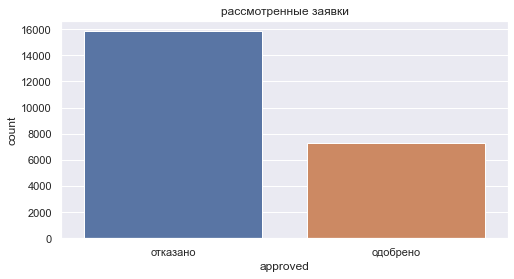

In [21]:
# всего 1/3 одобренных заявок и 2/3 отказов. на чем мы собираемя зарабатывать если делаем столько отказов?
sns.set(rc={'figure.figsize':(8, 4)})
sns.countplot(df['approved'])
plt.title('рассмотренные заявки')
plt.savefig('approved.png', dpi = 300)

In [22]:
# Посмотрим как распределены возвраты для тех кому мы одобрили(7269 человек)
df['bad'].value_counts()

кредит возвращен    5306
кредит просрочен    1963
Name: bad, dtype: int64

In [24]:
#73% возвращают кредит, 27% просрочек
df['bad'].value_counts(normalize=True)

кредит возвращен    0.729949
кредит просрочен    0.270051
Name: bad, dtype: float64

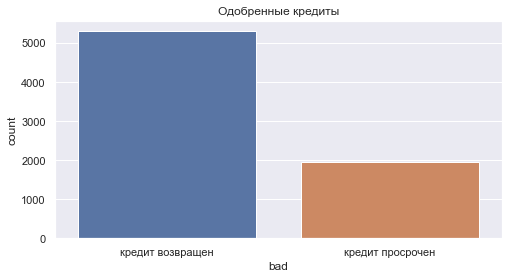

In [25]:
sns.countplot(df['bad'])
plt.title('Одобренные кредиты')
plt.savefig('approve_bad.png', dpi = 300)

**Первичный анализ целевых переменных показывает, что принимаем решения по одобрению заявок  с большой осторожностью (т.к много отказов), но в то же время для тех кому одобрили 27 % просрочек по кредитам. Можно сказать, что мы ошиблись выдав им кредит.**

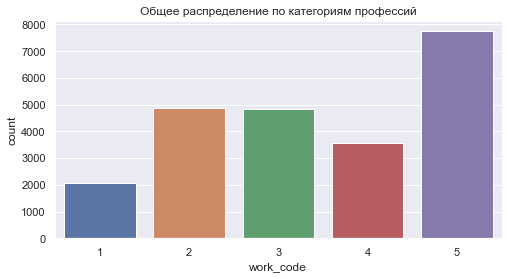

In [26]:
#Общее распределение по профессиям
sns.countplot(df['work_code'])
plt.title('Общее распределение по категориям профессий')
plt.savefig('work_code_general.png', dpi = 300)
#Самая многочисленная группа клиентов в категории №5 (рабочие) меньше всех №1(гос.служащие)

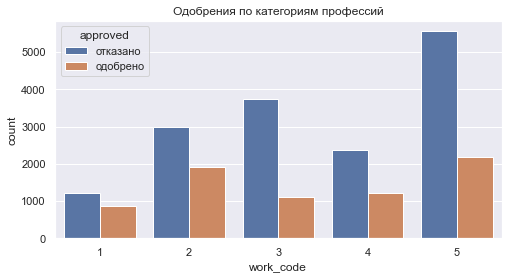

In [28]:
sns.countplot(x = df['work_code'],hue = "approved",data=df)
plt.title('Одобрения по категориям профессий')
plt.savefig('work_code_general_approve.png', dpi = 300)

In [29]:
tt = df.shape[0]
for work_code in [1,2,3,4,5]:   
    total = df[df['work_code'] == work_code].shape[0]
    print(f'Процентное соотношение  по коду професии {work_code} = {(total / tt)*100:.2f}% человек.')
    refuse = df[(df['work_code'] == work_code) & (df['approved'] == 'отказано')].shape[0]
    print(f'Количество отказов в выдаче кредита {refuse}  и количество одобрений {total - refuse}')
    print(f'В процентном соотношении {refuse *100 / total:.2f}% отказов и {(1 - refuse  / total)*100:.2f}% одобрений.')
    print()

Процентное соотношение  по коду професии 1 = 9.02% человек.
Количество отказов в выдаче кредита 1213  и количество одобрений 871
В процентном соотношении 58.21% отказов и 41.79% одобрений.

Процентное соотношение  по коду професии 2 = 21.12% человек.
Количество отказов в выдаче кредита 2976  и количество одобрений 1905
В процентном соотношении 60.97% отказов и 39.03% одобрений.

Процентное соотношение  по коду професии 3 = 20.91% человек.
Количество отказов в выдаче кредита 3734  и количество одобрений 1100
В процентном соотношении 77.24% отказов и 22.76% одобрений.

Процентное соотношение  по коду професии 4 = 15.44% человек.
Количество отказов в выдаче кредита 2366  и количество одобрений 1204
В процентном соотношении 66.27% отказов и 33.73% одобрений.

Процентное соотношение  по коду професии 5 = 33.51% человек.
Количество отказов в выдаче кредита 5558  и количество одобрений 2189
В процентном соотношении 71.74% отказов и 28.26% одобрений.



#### Посмотрим на заработную плату в зависимости от профессии

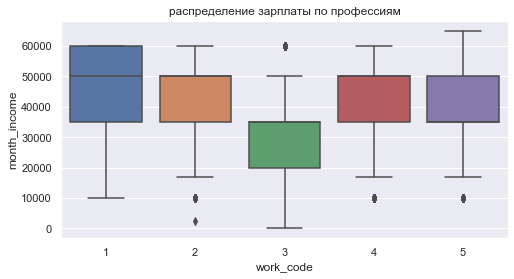

In [24]:
sns.boxplot(x='work_code', y="month_income", data=df)
plt.title('распределение зарплаты по профессиям')
plt.savefig('incone_work_code.png', dpi = 300)

In [30]:
df.groupby(by='work_code')['month_income'].agg([np.mean, np.median, np.min, np.max])

,mean,median,amin,amax
work_code,,,,
1,46002.879079,50000,10000,60000
2,43215.632043,50000,2500,60000
3,30008.274721,35000,0,60000
4,42068.067227,50000,10000,60000
5,39740.673809,35000,10000,65000


 - **зарплата гос.служ.  значительно смещена вверх  50% зарабатывают от 50 т.р до 60 т.р.**
 - **только в 3 гр. есть нулевая ЗП (работают не официально) в этой группе программисты и бухгалтера, возможно работаю не   официально на аутсорсинге.** 
 - **Странная минимальная зарплата 2,5 т.р. во второй группе меньше прожиточного минимума.**

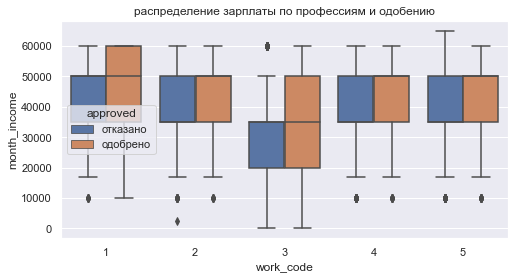

In [31]:
#Можно сделать вывод о том что зп не влияет на одобрение
sns.boxplot(x='work_code', y="month_income", hue="approved",  data=df)
plt.title('распределение зарплаты по профессиям и одобению')
plt.savefig('incone_work_code_approve.png', dpi = 300)

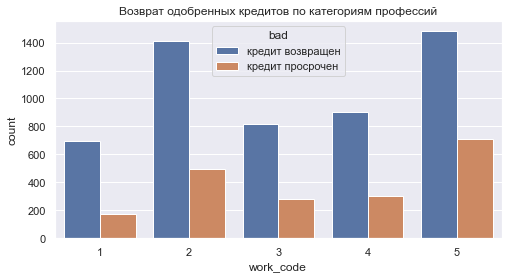

In [32]:
sns.countplot(x ='work_code', hue = "bad", data = df)
plt.title('Возврат одобренных кредитов по категориям профессий')
plt.savefig('Возврат_одобренных_кредитовwordk_code.png', dpi = 300)

In [43]:
tt = df_approve.shape[0]
for work_code in [1,2,3,4,5]:
    refuse = df_approve[(df_approve['work_code'] == work_code) & (df_approve['bad'] == 'кредит просрочен')].shape[0]
    print(f'по коду професии {work_code}:')
    print(f'Количество просрочек кредитов {refuse}  и количество возвратов  {total - refuse}')
    print(f'В процентном соотношении {refuse *100 / total:.2f}% кредитов просрочено и {(1 - refuse  / total)*100:.2f}% возвращено вовемя.')
    print()

по коду професии 1:
Количество просрочек кредитов 177  и количество возвратов  2012
В процентном соотношении 8.09% кредитов просрочено и 91.91% возвращено вовемя.

по коду професии 2:
Количество просрочек кредитов 496  и количество возвратов  1693
В процентном соотношении 22.66% кредитов просрочено и 77.34% возвращено вовемя.

по коду професии 3:
Количество просрочек кредитов 279  и количество возвратов  1910
В процентном соотношении 12.75% кредитов просрочено и 87.25% возвращено вовемя.

по коду професии 4:
Количество просрочек кредитов 303  и количество возвратов  1886
В процентном соотношении 13.84% кредитов просрочено и 86.16% возвращено вовемя.

по коду професии 5:
Количество просрочек кредитов 708  и количество возвратов  1481
В процентном соотношении 32.34% кредитов просрочено и 67.66% возвращено вовемя.



**Общий процент просрочек был 27% теперь мы видим, что основные категории у которых был просрок по кредиту это 5 категория и 2 категория**

### cred_sum_debt_all_all Сумма задолженности по всем кредитам

In [ ]:
#cred_sum_debt_all_all  - главный признак по которому мы принимает решение об одобрении или отказе (на основаниии дерева реешний)

In [95]:
# Кол. человек без задолженности по кредитам
df[df['cred_sum_debt_all_all'] == 0]['cred_sum_debt_all_all'].shape[0]


9167

In [50]:
df[df['cred_sum_debt_all_all'] == 0]['approved'].value_counts(normalize=True)

отказано    0.935857
одобрено    0.064143
Name: approved, dtype: float64

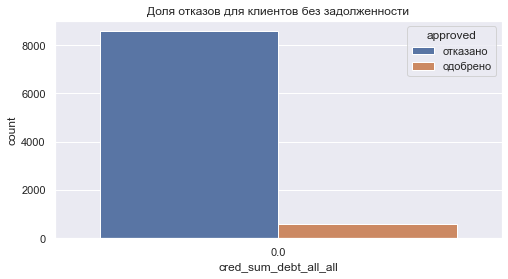

In [49]:
sns.countplot(x =df[df['cred_sum_debt_all_all'] == 0]['cred_sum_debt_all_all'],\
              hue = "approved", data = df)
plt.title('Доля отказов для клиентов без задолженности')
plt.savefig('Доля_отказов_без_задолженности.png', dpi = 300)

**Клиентам у которых нет задолженности в  мы отказываем 93,5%**
**Может быть у них много просрока по активным кредитам?**

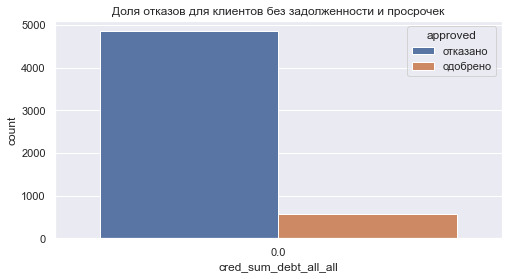

In [51]:
#Добавляем условия отсутсвие просрока
sns.countplot(x =df[(df['cred_sum_debt_all_all'] == 0) & (df['cred_day_overdue_all_sum_all'] == 0)]['cred_sum_debt_all_all'],\
              hue = "approved", data = df)
plt.title('Доля отказов для клиентов без задолженности и просрочек')
plt.savefig('Доля_отказов.png', dpi = 300)
#Соотношение сохранилось

In [56]:
#Посмотрим как возвращали кредиты,те у кого нет задолженности и нет просрочек по актв. кред.
df[(df['cred_sum_debt_all_all'] == 0) & (df['cred_day_overdue_all_sum_all'] == 0)]['bad'].value_counts()

кредит возвращен    439
кредит просрочен    135
Name: bad, dtype: int64

Примерно 75% кредит возвращали им следует изменить статус на одобрен

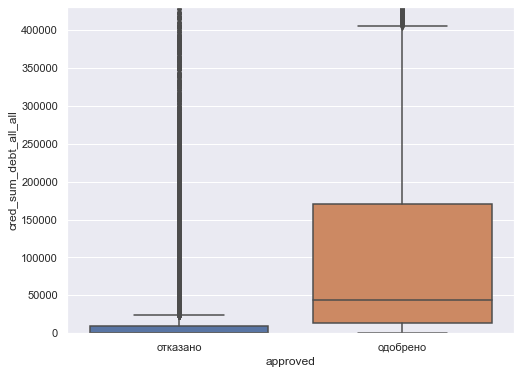

In [83]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='approved', y='cred_sum_debt_all_all', data=df)
fig.axis(ymin=0, ymax=430000);

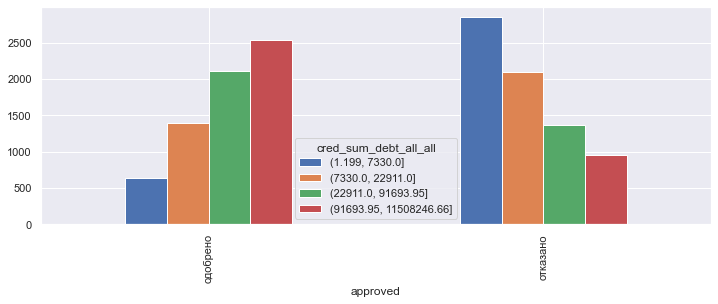

In [148]:
data = pd.qcut(df[df['cred_sum_debt_all_all'] != 0]['cred_sum_debt_all_all'], q=4)
pd.crosstab(df['approved'], data).plot(kind='bar')

**Чем больше Сумма задолженности по всем кредитам тем больше клиентов с одобрением и тем меньше отказов.**

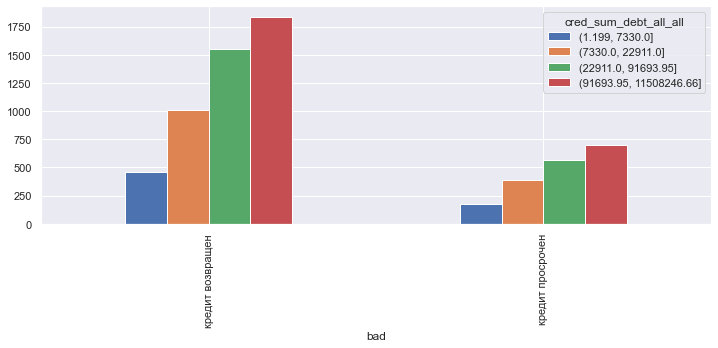

In [149]:
data = pd.qcut(df[df['cred_sum_debt_all_all'] != 0]['cred_sum_debt_all_all'], q=4)
pd.crosstab(df['bad'], data).plot(kind='bar')

### cred_sum_cc_all -  сумма кредитов по кредитным картам

In [10]:
# 9744 - без кредита по кредитной карте. 839 чел - 0.10 (странная суммма)
df['cred_sum_cc_all'].value_counts()

0.00         9744
5000.00       859
0.10          839
15000.00      489
10000.00      449
             ... 
353000.00       1
713857.04       1
110987.10       1
116920.00       1
159800.00       1
Name: cred_sum_cc_all, Length: 3401, dtype: int64

In [52]:
df[df['cred_sum_cc_all'] == 0]['approved'].value_counts(normalize=True)

отказано    0.790333
одобрено    0.209667
Name: approved, dtype: float64

Text(0.5, 1.0, 'Доля отказов для клиентов без кредита по кред. карте')

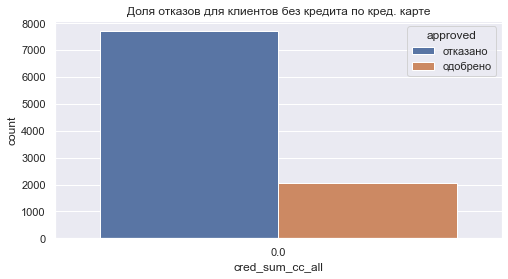

In [53]:
sns.countplot(x =df[df['cred_sum_cc_all'] == 0]['cred_sum_cc_all'],\
              hue = "approved", data = df)
plt.title('Доля отказов для клиентов без кредита по кред. карте')

In [116]:
df['cred_sum_debt_all_all'] = df['cred_sum_debt_all_all'].astype("int64")
cut_labels_4 = ['до 10 т.р.', 'до 50 т.р', '50-100', '100-250','Максимальная']
cut_bins = [0,10000, 20000, 50000, 100000, df['cred_sum_cc_all'].max() + 1]

df['cut_sum'] = pd.cut(df['cred_sum_cc_all'],
                       bins=cut_bins,
                       labels=cut_labels_4)

0

In [130]:
# максимальная задолженность 11 508 246 рублей  с id 6559217
df[df['cred_sum_debt_all_all'] == df['cred_sum_debt_all_all'].max()]

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,all_closed_creds_sum_ly,mfo_cred_mean_sum_3lm,delay_more_sum_all,all_creds_count_all,cred_day_overdue_all_sum_all,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
20079,6559217,46000.0,1,0,0,164778.79,12000000,9999,0.0,11508246.66,0,0.0,0,4,0,0.0,0,0.0,0,0,1,60000,20,NaN,отказано


In [59]:
# максимальная  сумма среди всех активных кредитов
df[df['all_active_creds_sum_all'] ==df['all_active_creds_sum_all'].max()]
#Этот же id что и с макс задолженностью

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,all_closed_creds_sum_ly,mfo_cred_mean_sum_3lm,delay_more_sum_all,all_creds_count_all,cred_day_overdue_all_sum_all,...,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved,year_last,Средняя задолженность,Месяцев на покрытие,Есть просрочка активных кредитов,Был взят кредит за последний месяц,Делают запросы в банки или другие МФО
20079,6559217,46000.0,1,0,0,164778.79,12000000,9999,0.0,11508246.66,0,0.0,0,4,0,...,0,0.0,0,0,1,60000,20,NaN,отказано,27,2877061.665,191.804111,0,0,1


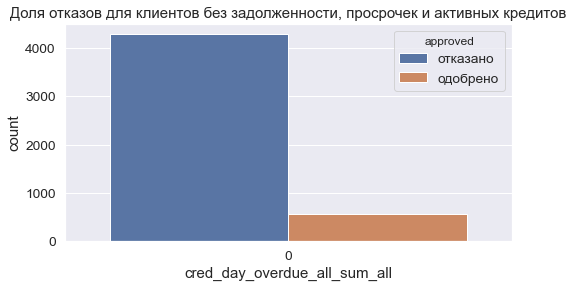

In [178]:
sns.countplot(x =df[(df['cred_sum_debt_all_all'] == 0) & (df['cred_day_overdue_all_sum_all'] == 0) & (df['all_active_creds_sum_all'] == 0)]['cred_day_overdue_all_sum_all'],\
              hue = "approved", data = df)
plt.title('Доля отказов для клиентов без задолженности, просрочек и активных кредитов')
plt.savefig('Доля_отказов_без активных_и_задолж.png', dpi = 300)

In [61]:
df.groupby(by='work_code')['cred_sum_cc_all'].agg([np.mean, np.median, np.min, np.max])
# в 3 кат. у половины нет кредита по кредитной карте (т.к медиана = 0)

,mean,median,amin,amax
work_code,,,,
1,80839.198037,23981.14,0.0,5739786.09
2,55110.059430,10000.00,0.0,2072777.17
3,31064.649789,0.00,0.0,1041000.00
4,49962.141384,8070.11,0.0,1669000.00
5,33153.843255,1000.00,0.0,1342500.00


(0.0, 400000.0)

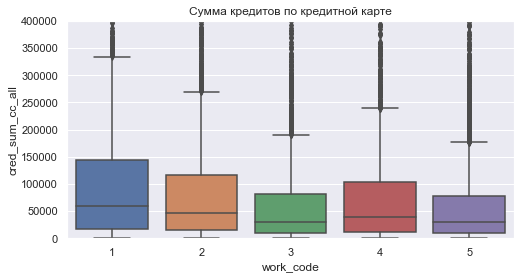

In [62]:
#график по тем у кого есть кредита по кредитным картам по кат. профессий
sns.boxplot(x='work_code', y=df[df['cred_sum_cc_all'] != 0.0]['cred_sum_cc_all'], data=df)
plt.title('Сумма кредитов по кредитной карте')
plt.savefig('cred_sum_cc_all.png', dpi = 300)
plt.ylim(0, 400000)

In [70]:
# Те кто ниразу не просрачивал все кредиты на более чем 90 дней  
# их  денежная сумма всех активных кредитов all_active_creds_sum_all 
df[df['delay_more_sum_all']== 0]['all_active_creds_sum_all'].value_counts()[:5]

0       2136
3000     312
5000     289
2000     279
4000     240
Name: all_active_creds_sum_all, dtype: int64

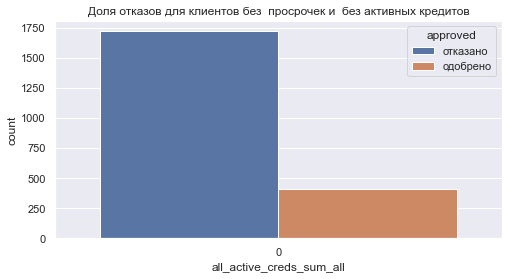

In [71]:
sns.countplot(x =df[(df['delay_more_sum_all'] == 0) & (df['all_active_creds_sum_all'] == 0)]['all_active_creds_sum_all'],\
              hue = "approved", data = df)
plt.title('Доля отказов для клиентов без  просрочек и  без активных кредитов')
plt.savefig('_без активных_и_задолж.png', dpi = 300)

2136 - без активных кредитов и долгих просроков  им стоит предложить и одобрить кредит

### Средняя задолженность

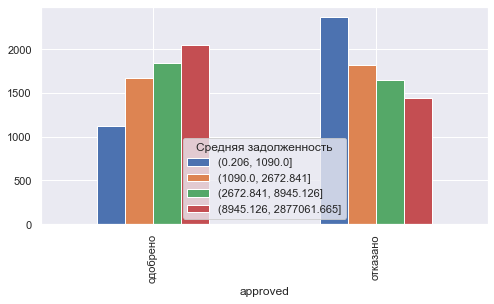

In [72]:
pd.crosstab(df['approved'], pd.qcut(df[df['Средняя задолженность'] != 0]['Средняя задолженность'], q=4)).plot(kind='bar')

**Напомню, что средняя задолженность это общая сумма задолж. деленное на кол. кредитов**
**Видно что с ростом задолженности кол. одобррений увел. и наоборот маленькая задолженнось и большое кол. отказов**

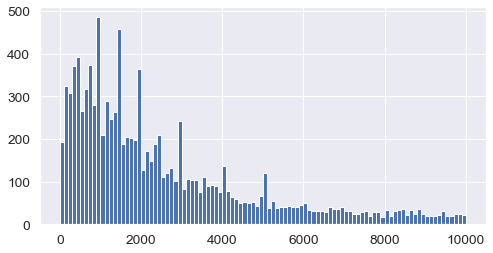

In [159]:
df[(df['Средняя задолженность'] != 0) & (df['Средняя задолженность'] < 10000)]['Средняя задолженность'].hist(bins=100)

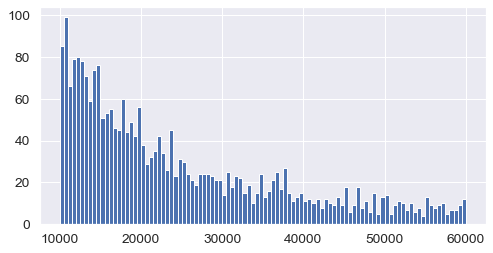

In [160]:
df[(df['Средняя задолженность'] >= 10000) & (df['Средняя задолженность'] < 60000)]['Средняя задолженность'].hist(bins=100)

### mfo_last_days_all - Количество дней с последнего займа в МФО

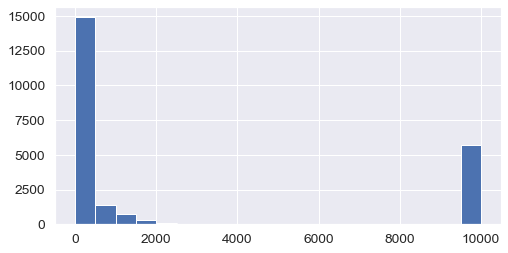

In [193]:
#СТранный скачок в районе 10000 дней . 27 лет????
df['mfo_last_days_all'].hist(bins=20)

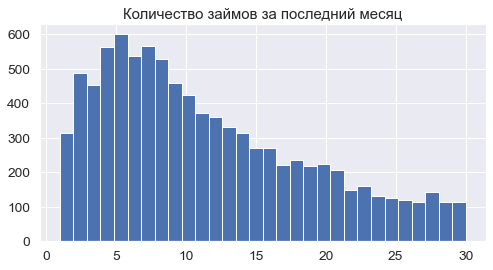

In [212]:
#Посмотрим как распределились кол. займов по последним дням
df[(df['mfo_last_days_all'] > 0) & (df['mfo_last_days_all'] < 31)]['mfo_last_days_all'].hist(bins=30)
plt.title('Количество займов за последний месяц')
plt.savefig('Последние_30_дней.png', dpi = 300)
#4,5,6,7 дней назад было набрано много займов, может перед празднииками или до дня зарплаты

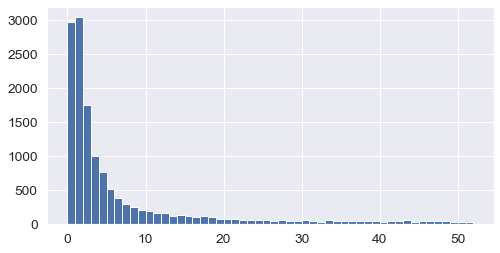

In [258]:
#Посмотрим распределение по неделям за последний год
(df[df['year_last'] == 0 ]['mfo_last_days_all'] // 7).hist(bins=52)

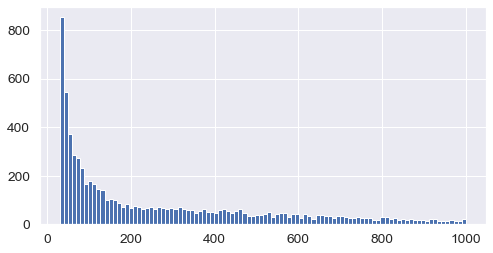

In [214]:
df[(df['mfo_last_days_all'] >= 31) & (df['mfo_last_days_all'] < 1000)]['mfo_last_days_all'].hist(bins=100)

In [ ]:
3105 дней - 1 чел
9999 дней - 5681 чел

In [254]:
# Количество клиентов датой последнего займа до 1 года
df[(df['mfo_last_days_all'] >= 0) & (df['mfo_last_days_all'] < 365)]['mfo_last_days_all'].count()

14177

In [250]:
df['year_last'].value_counts()

0     14177
27     5681
1      1581
2       730
3       494
4       274
5       106
6        54
7        18
8         1
Name: year_last, dtype: int64

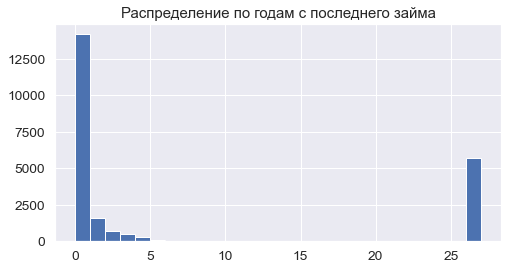

In [259]:
# Больше всего меньше года.и странные клиенты около 6 тысяч с последним кредитом 9999 дней назад
df['year_last'].hist(bins=27)
plt.title('Распределение по годам с последнего займа')
plt.savefig('последний_займ_год.png', dpi = 300)

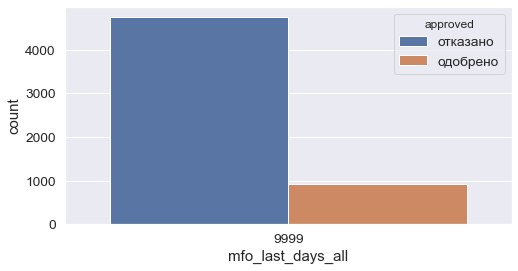

In [261]:
df[df['mfo_last_days_all'] == 9999]['mfo_last_days_all'].count()
sns.countplot(x =df[df['mfo_last_days_all'] == 9999]['mfo_last_days_all'],\
              hue = "approved", data = df)

In [76]:
df[df['mfo_last_days_all'] == 9999]['all_creds_count_lm'].value_counts()

0    5309
1     327
2      38
4       4
3       3
Name: all_creds_count_lm, dtype: int64

**в столбце Количество дней с последнего займа стоит значение 9999 - при том что в столбце all_creds_count_lm (кредиты взятые за последний месяц) присутсвуют значения больше 0 т.е. они брали в этом месяце кредиты**

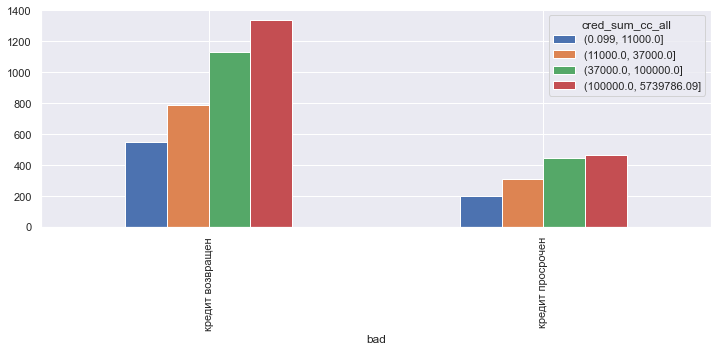

In [146]:
data = pd.qcut(df[df['cred_sum_cc_all'] != 0]['cred_sum_cc_all'], q=4)
pd.crosstab(df['bad'], data).plot(kind='bar')

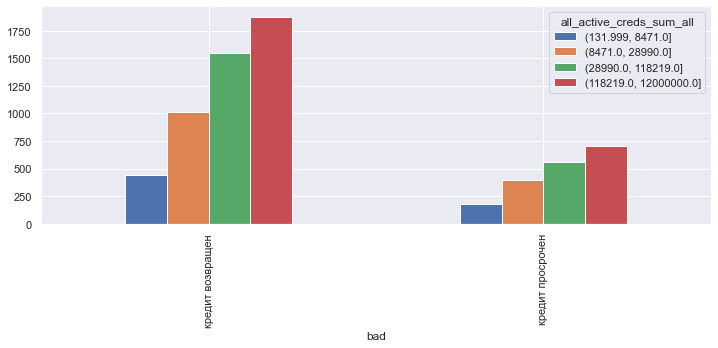

In [147]:
data = pd.qcut(df[df['all_active_creds_sum_all'] != 0]['all_active_creds_sum_all'], q=4)
pd.crosstab(df['bad'], data).plot(kind='bar')

### Запросы в другие кредитные организации

In [60]:
# #количество запросов на кредиты в другие в МФО. 13087 человек не делают запросы в другие МФО
df['mfo_inqs_count_month'].value_counts()[:5]

0    13087
1     3898
2     2110
3     1336
4      815
Name: mfo_inqs_count_month, dtype: int64

In [77]:
# #количество запросов на кредиты в Банки. 6586 человек не делают запросы 
df['bank_inqs_count_quarter'].value_counts()[:5]

0    6586
1    3473
2    2736
3    2083
4    1574
Name: bank_inqs_count_quarter, dtype: int64

In [268]:
# 4450 Столько людей не делают никуда запросы
df[(df['mfo_inqs_count_month'] == 0) & (df['bank_inqs_count_quarter'] == 0)].shape[0]

4450

In [416]:
our_client = df[(df['mfo_inqs_count_month'] == 0) & (df['bank_inqs_count_quarter'] == 0)]

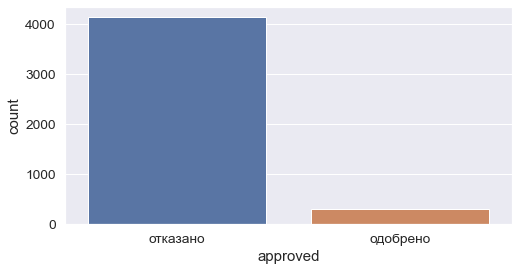

In [417]:
sns.countplot(our_client['approved'])
plt.title('Клиенты,которые никуда не подают заявки')
plt.savefig('mfo_inqs_bank.png', dpi = 300)

**Люди которые не делают никуда запросы на кредиты про них можно сказать что, они либо не заинтересованы в кредите либо лояльны к нашей мфо. Для следует одобрить и оправить смс потому что, когда им нужен будет кредит они обратятся к нам т.к будут знать, что им одобрен займ**

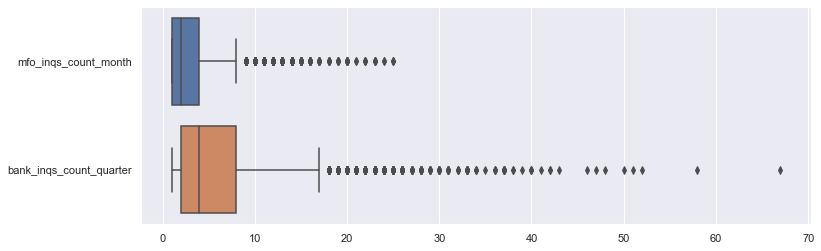

In [116]:
sns.set(rc={'figure.figsize':(12, 4)})
sns.boxplot(data = df[(df['mfo_inqs_count_month'] != 0) & (df['bank_inqs_count_quarter'] != 0)][['mfo_inqs_count_month','bank_inqs_count_quarter']],orient="h")

In [117]:
#среди тех кто делают запросы в дрегие организациии гос. служащие делают чаще запросы в банки, возможно им нужна больше сумма чем мы можем предложить.
df[(df['mfo_inqs_count_month'] != 0) & (df['bank_inqs_count_quarter'] != 0)][['mfo_inqs_count_month','bank_inqs_count_quarter','cred_max_overdue_max_ly','work_code','cred_sum_debt_all_all']].\
pivot_table(['cred_max_overdue_max_ly','mfo_inqs_count_month','bank_inqs_count_quarter','cred_sum_debt_all_all'], 
['work_code'], aggfunc='mean')

,bank_inqs_count_quarter,cred_max_overdue_max_ly,cred_sum_debt_all_all,mfo_inqs_count_month
work_code,,,,
1,7.182568,6168.194547,228980.921013,3.230860
2,6.711811,4070.887627,152645.405223,3.249869
3,4.761943,3905.622715,74877.135661,2.745223
4,6.453809,5126.887536,148752.951775,3.094814
5,5.984900,3818.095315,94631.607656,3.085693


In [118]:
df[(df['mfo_inqs_count_month'] == 0) & (df['bank_inqs_count_quarter'] == 0)][['cred_max_overdue_max_ly','work_code','cred_sum_debt_all_all']].pivot_table(['cred_max_overdue_max_ly','cred_sum_debt_all_all'], 
['work_code'], aggfunc='mean')

,cred_max_overdue_max_ly,cred_sum_debt_all_all
work_code,,
1,3552.586731,64564.268462
2,3238.791080,30296.325736
3,2701.317417,10709.164291
4,4547.758571,15994.188650
5,3105.973930,14443.847229


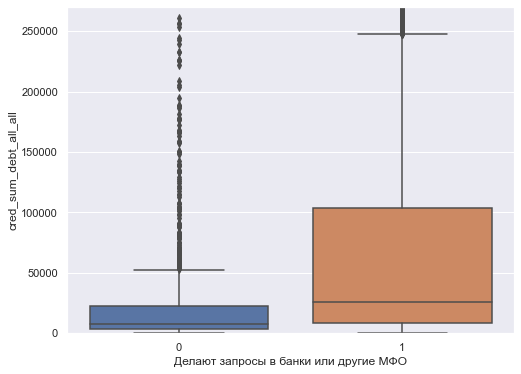

In [119]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df['Делают запросы в банки или другие МФО'],y=df[df['cred_sum_debt_all_all'] != 0]['cred_sum_debt_all_all'] )
fig.axis(ymin=0, ymax=270000);

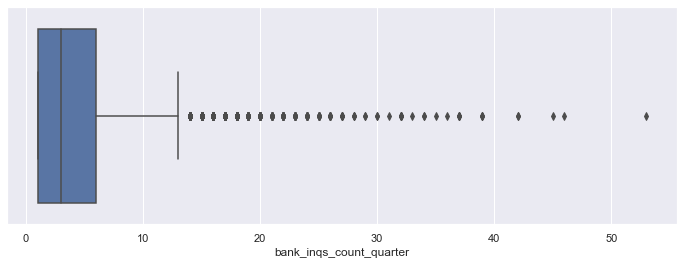

In [120]:
# человек не делает запросы в МФО только в банки
sns.boxplot(df[(df['mfo_inqs_count_month'] == 0) & (df['bank_inqs_count_quarter'] != 0)]['bank_inqs_count_quarter'],orient="h")

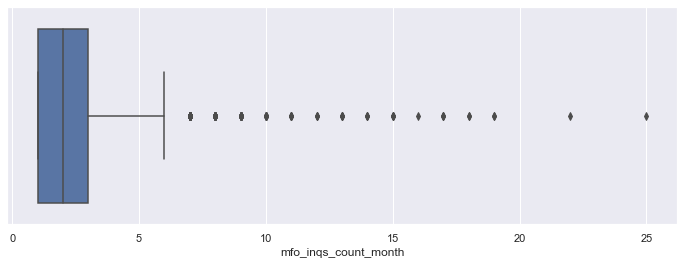

In [122]:
sns.boxplot(df[(df['mfo_inqs_count_month'] != 0) & (df['bank_inqs_count_quarter'] == 0)]['mfo_inqs_count_month'],orient="h")

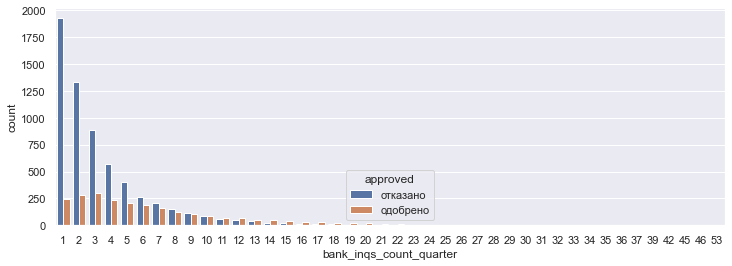

In [121]:
sns.countplot(df[(df['mfo_inqs_count_month'] == 0) & (df['bank_inqs_count_quarter'] != 0)]['bank_inqs_count_quarter'],hue = df['approved'])

### all_creds_count_all -  Общее количество кредитов

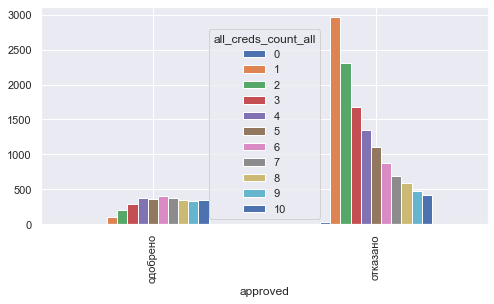

In [426]:
pd.crosstab(df['approved'], df['all_creds_count_all'])[[0,1,2,3,4,5,6,7,8,9,10]].plot(kind='bar')

**На графике выше видно, что чем меньше кредитов у людей тем больше мы отказываем. Отказываем даже тем у кого нет кредитов.**
**С увеличение кредитов количество одобррений не изменяется**

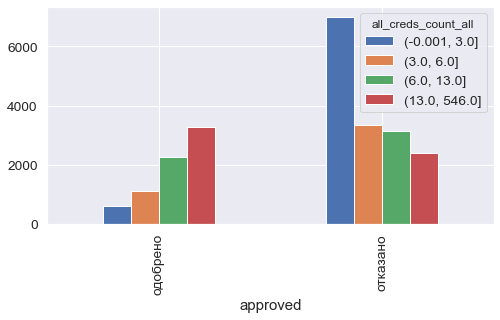

In [480]:
#pd.qcut(df['all_creds_count_all'], q=4)
#Общее количество кредитов
pd.crosstab(df['approved'], pd.qcut(df['all_creds_count_all'], q=4)).plot(kind='bar')

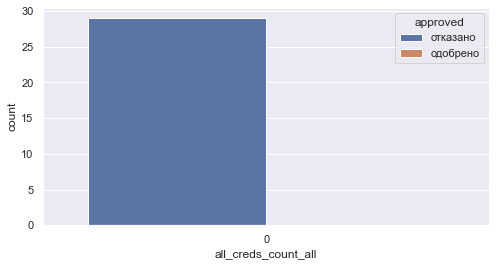

In [396]:
#Среди тех у кого нет кредитов мы отказали 29 людям(всем из тех у кого нет)
sns.countplot(x = df[df['all_creds_count_all']== 0]['all_creds_count_all'],hue ='approved',data=df)

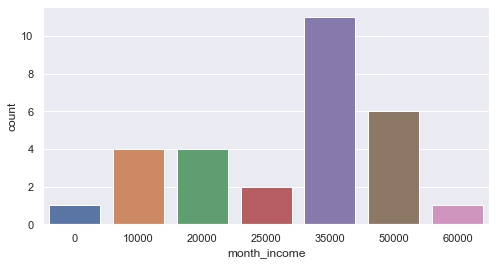

In [401]:
# Посмотрим их доход может они ничего не зарабатывают? 
# в основном с зарплатой 35 т.р. ... только у одного нет доход 
df[df['all_creds_count_all']== 0]['month_income'].value_counts()
sns.countplot(x = df[df['all_creds_count_all']== 0]['month_income'])

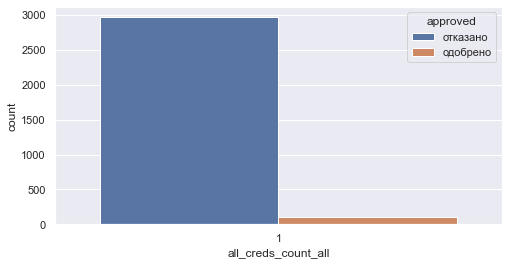

In [402]:
#  укого 1 кредит
sns.countplot(x = df[df['all_creds_count_all']== 1]['all_creds_count_all'],hue ='approved',data=df)

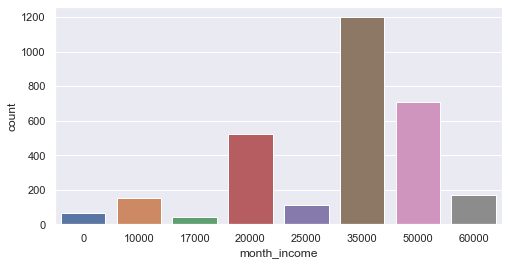

In [403]:
sns.countplot(x = df[(df['all_creds_count_all']== 1)  & (df['approved']== 'отказано')]['month_income'])

### all_closed_creds_sum_all - сумма закрытых кредитов

(0.0, 700000.0)

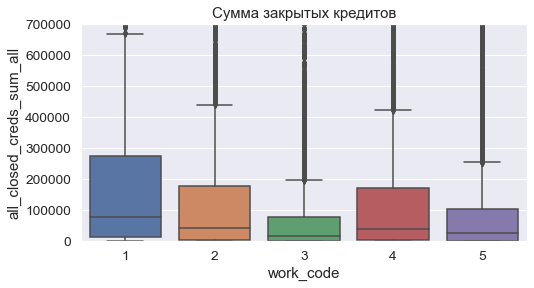

In [458]:
sns.boxplot(x='work_code', y='all_closed_creds_sum_all', data=df)
plt.title('Сумма закрытых кредитов')
plt.savefig('all_closed_creds_sum_all.png', dpi = 300)
plt.ylim(0, 700000)

In [84]:
#df['all_closed_creds_sum_all']
df.pivot_table(['all_closed_creds_sum_all'], ['bad'], aggfunc='mean')

,all_closed_creds_sum_all
bad,
кредит возвращен,287749.899359
кредит просрочен,228474.521651


In [95]:
data = df[(df['all_closed_creds_sum_all'] != 0) & (df['all_active_creds_sum_all'] != 0)][['all_closed_creds_sum_all','all_active_creds_sum_all']]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


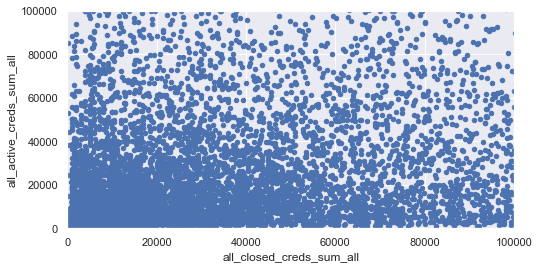

In [99]:
#data = pd.concat([df[df['all_closed_creds_sum_all'] != 0]['all_closed_creds_sum_all'],df[df['all_active_creds_sum_all'] != 0]['all_active_creds_sum_all']], axis=1)
data.plot.scatter(x='all_closed_creds_sum_all', y='all_active_creds_sum_all', ylim=(0,100000),xlim=(0,100000));

### all_active_creds_sum_all - денежная сумма всех активных кредитов

In [205]:
df.groupby(by='work_code')['all_active_creds_sum_all'].describe()
# в 3 кат. маленькая денежная сумма кредитов

,count,mean,std,min,25%,50%,75%,max
work_code,,,,,,,,
1,2084.0,263096.699136,689019.035072,0.0,6000.0,39883.0,198075.25,12000000.0
2,4881.0,161542.208564,428330.842454,0.0,4144.0,24000.0,116000.00,7221149.0
3,4834.0,75914.936905,256989.326928,0.0,0.0,7483.0,37801.00,6612725.0
4,3570.0,150558.581232,385117.067866,0.0,2212.5,19248.0,102950.00,5950985.0
5,7747.0,93886.261262,300370.618480,0.0,1483.0,12000.0,52841.00,6845060.0


(0.0, 600000.0)

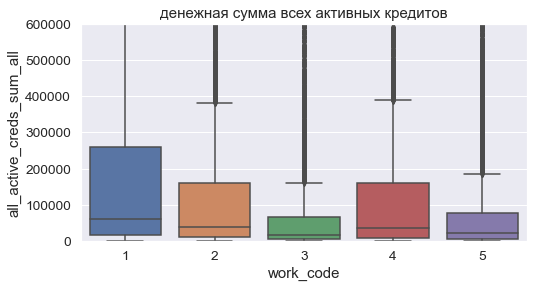

In [460]:
sns.boxplot(x='work_code', y=df[df['all_active_creds_sum_all'] != 0.0]['all_active_creds_sum_all'], data=df)
plt.title('денежная сумма всех активных кредитов')
plt.savefig('all_active_creds_sum_all.png', dpi = 300)
plt.ylim(0, 600000)

### cred_max_overdue_max_ly - максимальная просрочка за год

In [226]:
df['cred_max_overdue_max_ly'].value_counts()

0.00        15074
5000.00       335
3000.00       309
10000.00      278
4000.00       258
            ...  
4731.41         1
2453.50         1
12779.59        1
5261.21         1
56.00           1
Name: cred_max_overdue_max_ly, Length: 3734, dtype: int64

In [227]:
# -средняя максимальная просрочка за год по профессиям
df.pivot_table(['cred_max_overdue_max_ly'], 
['work_code'], aggfunc='mean')

,cred_max_overdue_max_ly
work_code,
1,5925.190489
2,4340.359902
3,3154.272662
4,4325.997429
5,3856.789312


In [229]:
# убрать тех у кого просрочки нет(=0) в первой группе просрочка выше чем у остальных
df[df['cred_max_overdue_max_ly'] != 0.0].pivot_table(['cred_max_overdue_max_ly'], 
['work_code'], aggfunc='mean')

,cred_max_overdue_max_ly
work_code,
1,14717.636448
2,11457.705073
3,10472.358551
4,11907.332938
5,11487.330565


In [235]:
rr = df[df['cred_max_overdue_max_ly'] == 0.0].shape[0]
print(f'Кол. клиентов у которых не было просрока за год {rr}')

Кол. клиентов у которых не было просрока за год 15074


In [249]:
#кол чел. без задолженности
df[df['cred_sum_debt_all_all'] == 0.0].pivot_table(['cred_sum_debt_all_all'], 
['work_code'], aggfunc='count')

,cred_sum_debt_all_all
work_code,
1,640
2,1581
3,2288
4,1374
5,3284


### Region

In [296]:
df['region'].value_counts()[:5]


45    1115
46    1091
3      883
65     808
80     796
Name: region, dtype: int64

In [342]:
top_regions = pd.Series(data=df['region'].value_counts()[:5].values, index=['Курганская','Курская','Бурятия','Сахалинская','Забайкальский край'])

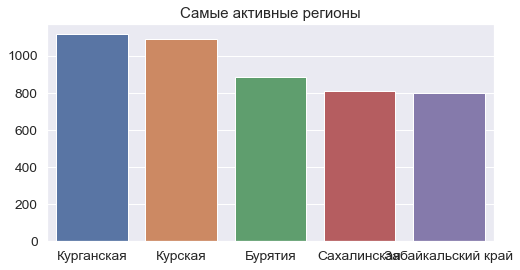

In [343]:
#region регион подачи заявка
sns.barplot(x=['Курганская','Курская','Бурятия','Сахалинская','Забайкальский край'], y=top_regions)
plt.title('Самые активные регионы')
plt.savefig('Регионы_активные.png', dpi = 300)

In [347]:
df['region'].value_counts()[-10:]

99    45
44    32
26    21
55     9
62     7
77     6
43     5
48     4
0      4
59     2
Name: region, dtype: int64

(77,97,99) - город Москва

In [ ]:
# 45 рег - Курганская (Уральский)
# 46 рег - Курская (Центральный)
# 3 рег Бурятия (Сибирский)
# 65 - Сахалинская (Дальневосточный)
# 80 - Забайкальский край (Сибирский)
# 60 регион: Псковская область (Северо-Западный)
# всего 2 человека из 59 региона Пермский край (у Перми еще номера регионов есть)
# всего 4 из 48 Липецкая область (Центральный) 

In [337]:
df['region'].nunique()

90

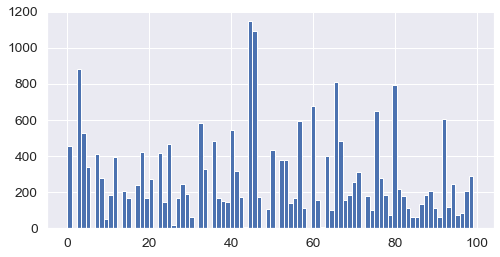

In [340]:
df['region'].hist(bins = 90)

In [132]:
list_of_region = list(df['region'].value_counts().index)

In [133]:
len(list_of_region)

90

In [138]:
region_None = list(set(i for i in range(100))-set(list_of_region))
region_None

[2, 35, 6, 72, 13, 16, 51, 21, 23, 31]

**4 человека с регионом 0**.
**Отсутсвуют клиенты в данных регионах, следует провести интернет рекламу или открыть офисы:**
1. Республика Башкортостан
2. Вологодская область
3. Республика Ингушетия
4. Тюменская область
5. Республика Мордовия
6. Республика Татарстан
7. Мурманская область
8. Чувашская Республика
9. Краснодарский край
10. Белгородская область

### delay_more_sum_all - Количество просрочек более чем на 90 дней по всем кредитам

In [105]:
# Количество просрочек более чем на 90 дней по всем кредитам
df['delay_more_sum_all'].value_counts()

0      12950
1       1769
2       1009
3        757
4        744
       ...  
124        1
104        1
130        1
114        1
111        1
Name: delay_more_sum_all, Length: 125, dtype: int64

In [107]:
df[df['delay_more_sum_all'] != 0]['delay_more_sum_all'].median()

6.0

In [111]:
df[df['delay_more_sum_all'] == 0]['approved'].value_counts()

отказано    7389
одобрено    5561
Name: approved, dtype: int64

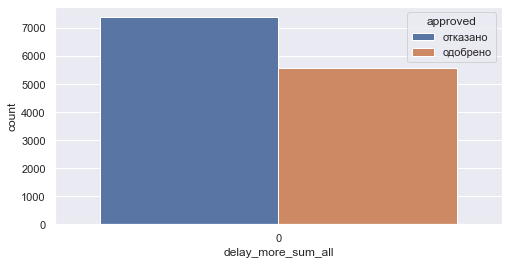

In [115]:
sns.countplot(x = df[df['delay_more_sum_all'] == 0]['delay_more_sum_all'],hue='approved',data =df)

In [108]:
data = pd.qcut(df[df['delay_more_sum_all'] != 0]['delay_more_sum_all'], q=4)

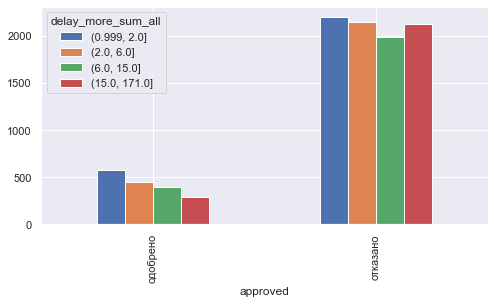

In [109]:
#Количество просрочек более чем на 90 дней по всем кредитам 
pd.crosstab(df['approved'], data).plot(kind='bar')

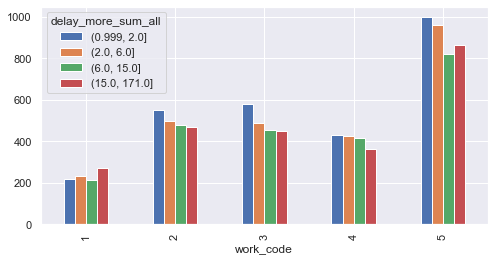

In [110]:
#Количество просрочек более чем на 90 дней по всем кредитам  по кат. профессий
pd.crosstab(df['work_code'], data).plot(kind='bar')

**Стоит отметить что в 1 категории самое часто встречающиеся значение по кол. просрочек именно от 15 до 171 в остальных от 1 до 2**
**Считаю много одобрений для тех у кого просрочек более 6 раз на 90 дней однажды они не вернут.**
**В тоже время следует тем у кого не было ниразу просрочек на 90 дней повысить одобрение.**

### mfo_cred_mean_sum_3lm Средняя сумма МФО кредитов, выданных за последние 3 месяца

In [313]:
# 11397 средняя сумма = 0 значит они не брали кредиты последние 3 месяца
df['mfo_cred_mean_sum_3lm'].value_counts()

0.000000        11397
3000.000000       490
4000.000000       422
2000.000000       421
5000.000000       389
                ...  
7348.000000         1
4312.000000         1
18317.500000        1
3313.888889         1
7111.111111         1
Name: mfo_cred_mean_sum_3lm, Length: 4459, dtype: int64

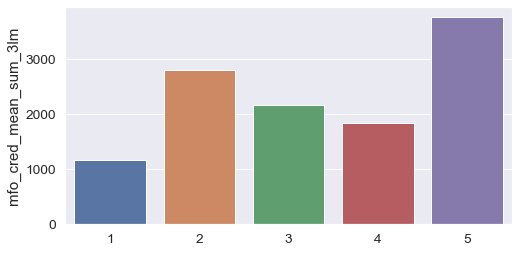

In [404]:
# кол. МФО кредитов, выданных за последние 3 месяца
sns.barplot(x=[1,2,3,4,5], y=df[df['mfo_cred_mean_sum_3lm']!=0].groupby(by='work_code')['mfo_cred_mean_sum_3lm'].count())

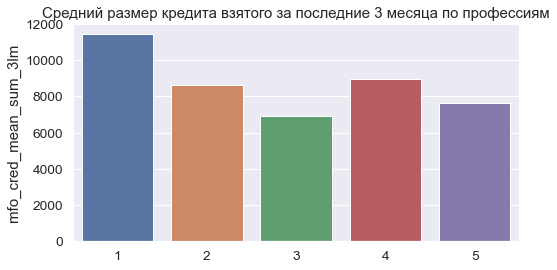

In [336]:
#Средняя сумма МФО кредитов, выданных за последние 3
sns.barplot(x=[1,2,3,4,5], y=df[df['mfo_cred_mean_sum_3lm']!=0].groupby(by='work_code')['mfo_cred_mean_sum_3lm'].mean())
plt.title('Средний размер кредита взятого за последние 3 месяца по профессиям')
plt.savefig('Средний_размер_кредита_взятого_за_последние_3.png', dpi = 300)

**В первой группе берут меньшее кол. кредитов, но средняя  сумма больше всех. По сравнению с 5 катеогрией. Где берут много  кредитов.**

In [37]:
df[df['mfo_cred_mean_sum_3lm']!=0].groupby(by='work_code')['mfo_cred_mean_sum_3lm'].agg([np.mean,np.median])

,mean,median
work_code,,
1,11440.178919,8492.750000
2,8657.771599,6850.000000
3,6894.879544,5000.000000
4,8987.239239,6954.166667
5,7657.271419,5785.857143


(0.0, 30000.0)

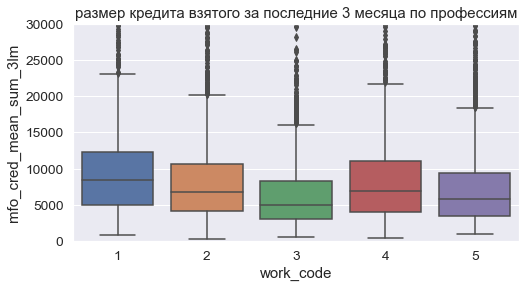

In [439]:
sns.boxplot(x='work_code', y=df[df['mfo_cred_mean_sum_3lm']!=0]['mfo_cred_mean_sum_3lm'], data=df)
plt.title('размер кредита взятого за последние 3 месяца по профессиям')
plt.savefig('mfo_cred_mean_sum_3lm_work_code.png', dpi = 300)
plt.ylim(0, 30000)

### Месяцев на покрытие (Платежеспособность)

In [386]:
# Кол. человек у которых долгов меньньше месячной зарплаты
df[df['Месяцев на покрытие'] <= 1]['Месяцев на покрытие'].count()# 8364 человек

8364

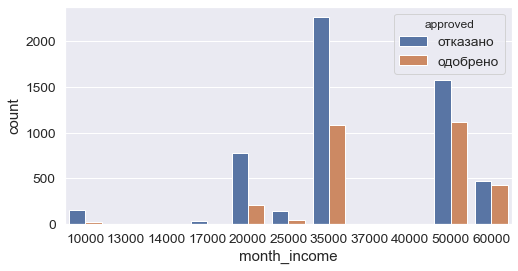

In [387]:
# график показывает, что отказов больше чем одобрений для тех у кого долг не превосходит месяцную ЗП
sns.countplot(x = df[df['Месяцев на покрытие'] <= 1]['month_income'],hue = "approved",data=df)

**отказанных больше чем одобренных, долг клиентов не такой большой по отношению к ЗП**

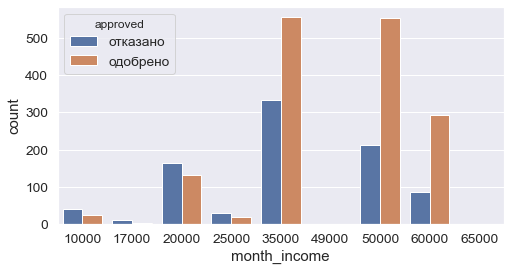

In [390]:
sns.countplot(x = df[(df['Месяцев на покрытие'] > 1) & (df['Месяцев на покрытие'] <= 3)]['month_income'],hue = "approved",data=df)

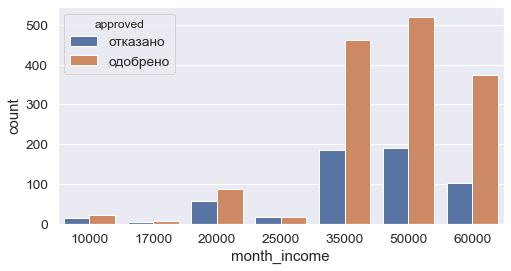

In [402]:
# аналогичная ситуация с задолже от 1 до 3
sns.countplot(x = df[(df['Месяцев на покрытие'] > 3) & (df['Месяцев на покрытие'] <= 12)]['month_income'],hue = "approved",data=df)

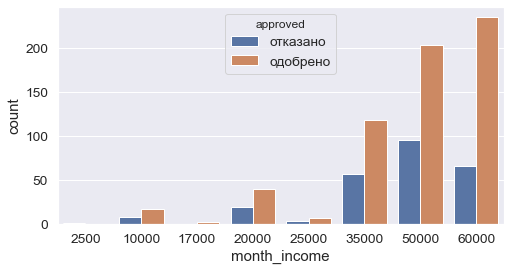

In [410]:
# если чтобы покрыть долг нужно более 12 зарплат то мы им одобряем на них и так долговая нагрузка
sns.countplot(x = df[df['Месяцев на покрытие'] > 12]['month_income'],hue = "approved",data=df)

**С увеличением количества долга на месячную зарплату растет и количество одобрений, что странно. Например последний график - чтобы покрыть долг нужно более 12 зарплат, но мы им одобряем на них и так долговая нагрузка вероятность возрата небольшая.**

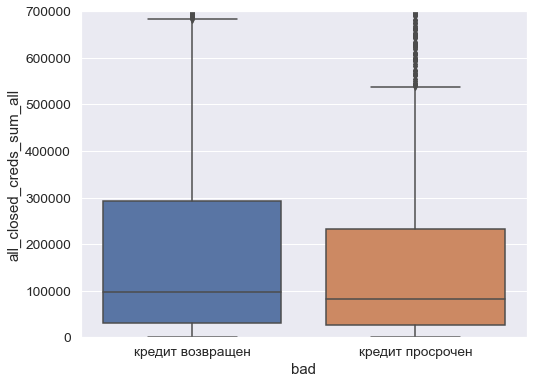

In [461]:
#лоигчно чем больше сумма возврата тем более идет возврат кредита
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='bad', y='all_closed_creds_sum_all', data=df_approve)
fig.axis(ymin=0, ymax=700000);

### cred_day_overdue_all_sum_all Суммарное количество дней просрочки текущих активных кредитов	

In [463]:
df['cred_day_overdue_all_sum_all'].value_counts()

0       15046
14         69
7          68
8          68
11         66
        ...  
3241        1
1224        1
3321        1
3337        1
2007        1
Name: cred_day_overdue_all_sum_all, Length: 2318, dtype: int64

In [465]:
df['Есть просрочка активных кредитов'].value_counts()

0    15046
1     8070
Name: Есть просрочка активных кредитов, dtype: int64

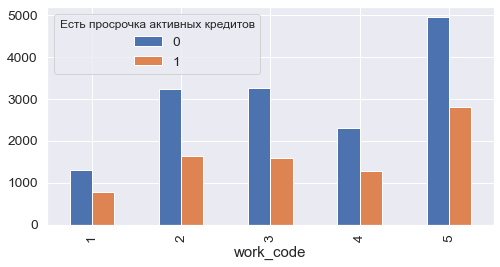

In [483]:
pd.crosstab(df['work_code'], df['Есть просрочка активных кредитов']).plot(kind='bar')

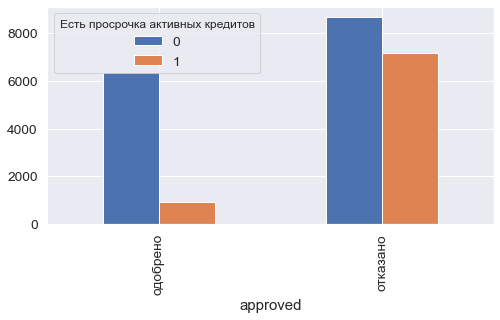

In [473]:
pd.crosstab(df['approved'], df['Есть просрочка активных кредитов']).plot(kind='bar')

**Много кому отказали, несмотря на то что просрочек активных кредитов нет**

###  Был взят кредит за последний месяц'

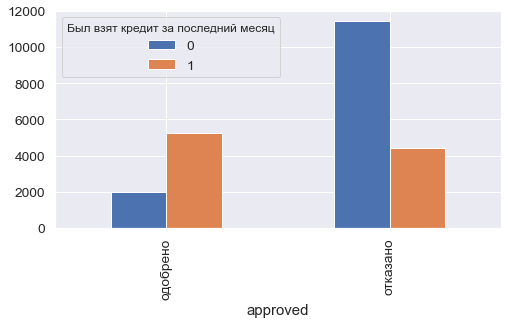

In [476]:
pd.crosstab(df['approved'], df['Был взят кредит за последний месяц']).plot(kind='bar')

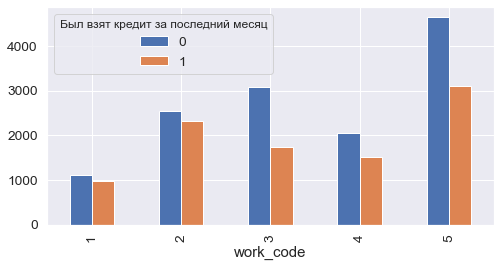

In [484]:
pd.crosstab(df['work_code'], df['Был взят кредит за последний месяц']).plot(kind='bar')

### cred_sum_overdue_cc_all - Сумма просрочек по кредитным картам

In [103]:
df['cred_sum_overdue_cc_all'].value_counts()# 20281 клиентов без просрочек

0.00        20281
600.00          9
100.00          7
15000.00        5
5000.00         4
            ...  
4476.56         1
4014.61         1
1652.65         1
5581.89         1
18948.38        1
Name: cred_sum_overdue_cc_all, Length: 2780, dtype: int64

In [101]:
data = df[(df['cred_sum_overdue_cc_all'] != 0) & (df['cred_sum_cc_all'] != 0)][['cred_sum_overdue_cc_all','cred_sum_cc_all']]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


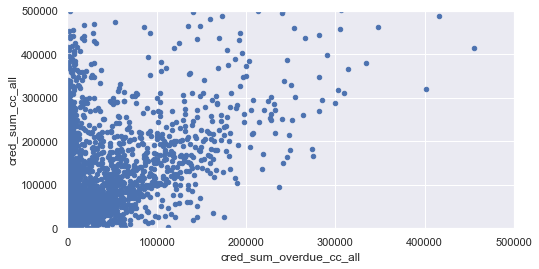

In [104]:
data.plot.scatter(x='cred_sum_overdue_cc_all', y='cred_sum_cc_all', ylim=(0,500000),xlim=(0,500000));

**При росте суммы кредитов по кредитной карте, растет сумма просрочек по кредитным картам коэф. корреляции 0,5**